### Importacoes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import DataReader

### DataFrame

In [2]:
end = pd.to_datetime('today')
start = end - np.timedelta64(1, 'Y')

base = pd.DataFrame(DataReader('BBDC4.SA', 'yahoo', start, end)['Close'])
# df.head()

In [3]:
df = base.copy()

### funcoes

In [4]:
# medias moveis, padrao 20
def medias_moveis(df, periodos=20):
    df[f'mean_{periodos}'] = df['Close'].rolling(window=periodos).mean()

In [5]:
# retorna um DataFrame, para concatenar ao df, original
def media_exponencial(df, periodos=10):
    df_mme = pd.DataFrame(pd.core.window.ExponentialMovingWindow(df, periodos).mean())
    df_mme.columns = [f'mme_{periodos}']
    return df_mme

In [38]:
# Recebe um Serie, retorna um df com a linha macd e o sinal
def macd(df, curta=12, longa=26, sinal=9):
    a = media_exponencial(df, curta)
    b = media_exponencial(df, longa)
    df_macd = pd.DataFrame(a.values - b.values)
    df_macd.columns = ['macd']
    df_macd[f'mme_macd_{sinal}'] = media_exponencial(df_macd, sinal)
    return  df_macd

### Area Teste

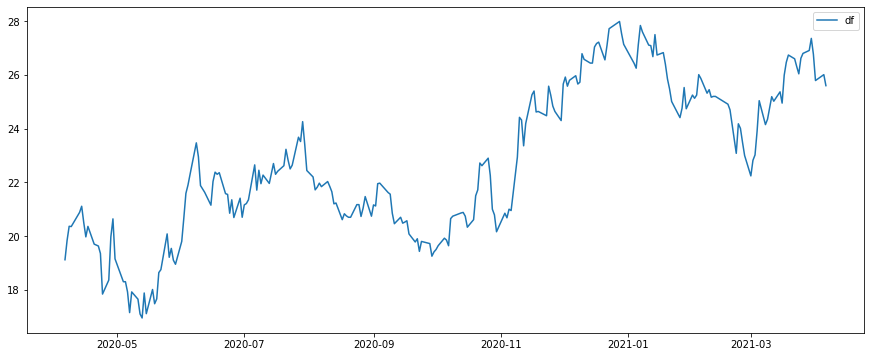

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df, label='df')


plt.legend()
plt.show()

In [8]:
a = media_exponencial(df['Close'], 12)
b = media_exponencial(df['Close'], 26)
df_completo = pd.concat([df, a, b], axis=1)

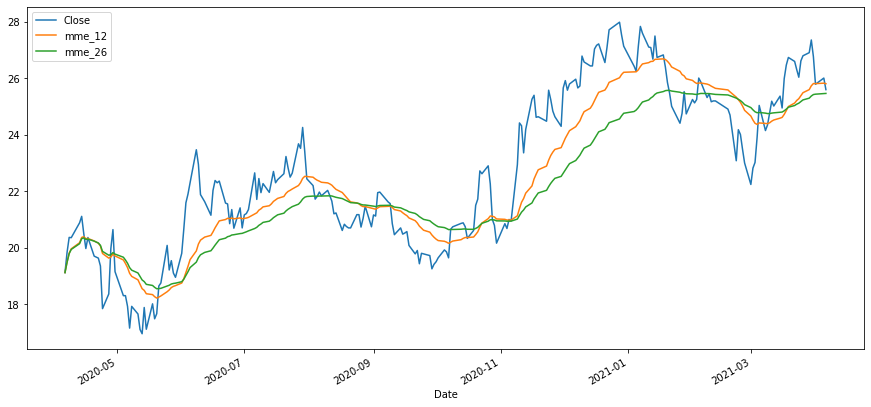

In [12]:
df_completo.plot(figsize=(15, 7))
plt.show()

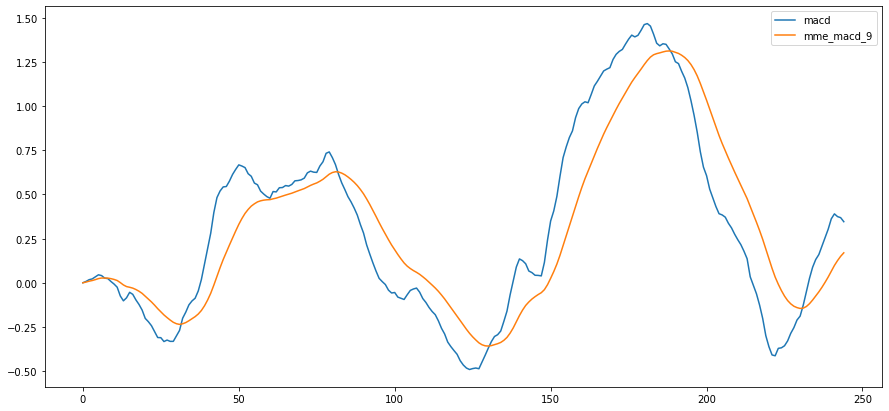

In [41]:
macd(df).plot(figsize=(15, 7))
plt.show()